## A quick look at the data
We will quickly explore what the data looks like and how we may proceed.

In [ ]:
import numpy as np 
import pandas as pd
%pylab inline

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))


## Explore training data
- The file is large. Let's start with reading a small number rows first.

In [ ]:
# read the training data
# the data is large. Read a small number of rows for now
train_data = pd.read_csv('../input/train.csv', nrows=100000)
train_data.head()

Let's plot part of the data to see what it looks like.

In [ ]:

fig, ax = plt.subplots(1,4,figsize=(13,4))
ax[0].plot(train_data.time_to_failure.values)
ax[0].set_xlabel('Index'); ax[0].set_ylabel('time to failure')
ax[1].plot(train_data.acoustic_data.values)
ax[1].set_xlabel('Index'); ax[1].set_ylabel('acoustic data')
ax[2].plot(np.diff(train_data.time_to_failure.values))
ax[2].set_xlabel('Index'); ax[2].set_ylabel('step of time_to_failure')
ax[3].plot(train_data.acoustic_data.values, train_data.time_to_failure.values, 'o', alpha=0.1)
ax[3].set_xlabel('acoustic data'); ax[3].set_ylabel('time to failure')
plt.tight_layout(pad=2)

The `time_to_failure` does not appear to change from the table. It is in fact changing but very slowly by roughly 1 ns, then every 4096 point it jumps by 1 ms.

The 4096 segments could be related to the way the instrument takes the measurements. We can plot 3 segments to see what's going on.



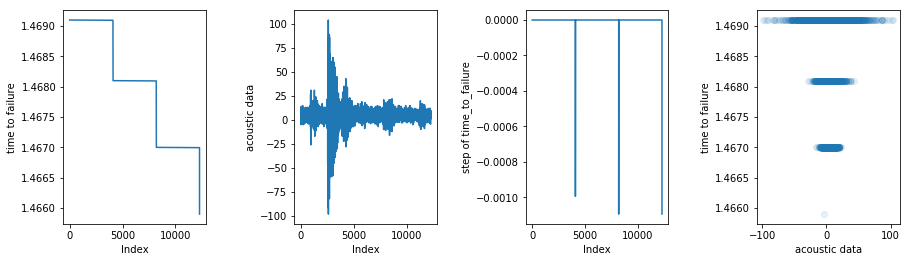

In [11]:
fig, ax = plt.subplots(1,4,figsize=(13,4))
nplt = 4096*3
ax[0].plot(train_data.time_to_failure.values[:nplt])
ax[0].set_xlabel('Index'); ax[0].set_ylabel('time to failure')
ax[1].plot(train_data.acoustic_data.values[:nplt])
ax[1].set_xlabel('Index'); ax[1].set_ylabel('acoustic data')
ax[2].plot(np.diff(train_data.time_to_failure.values[:nplt]))
ax[2].set_xlabel('Index'); ax[2].set_ylabel('step of time_to_failure')
ax[3].plot(train_data.acoustic_data.values[:nplt], train_data.time_to_failure.values[:nplt], 'o', alpha=0.1)
ax[3].set_xlabel('acoustic data'); ax[3].set_ylabel('time to failure')
plt.tight_layout(pad=2)

So it looks like the acoustic data changes within the 4096 segments, so there is useful information that we want to use.
The `time_to_failure` is still decreasing, so we haven't seen a quake yet. Let's load more data

### Loading longer segments


In [12]:
# read the training data
# the data is large. Read a small number of rows for now
train_data_long = pd.read_csv('../input/train.csv', nrows=10000000)
train_data_long.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


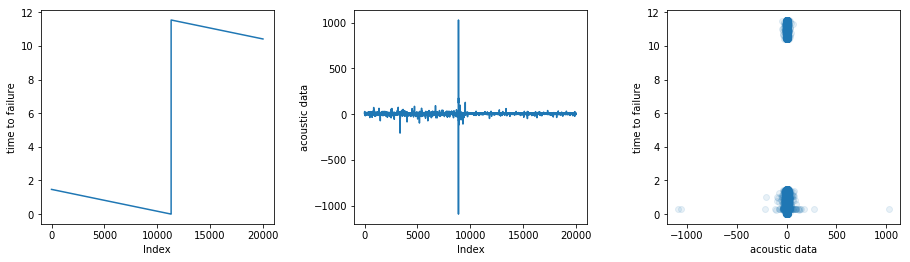

In [13]:
# plot every 500 points, so we explore the data quickly
fig, ax = plt.subplots(1,3,figsize=(13,4))
ax[0].plot(train_data_long.time_to_failure.values[::500])
ax[0].set_xlabel('Index'); ax[0].set_ylabel('time to failure')
ax[1].plot(train_data_long.acoustic_data.values[::500])
ax[1].set_xlabel('Index'); ax[1].set_ylabel('acoustic data')
ax[2].plot(train_data_long.acoustic_data.values[::500], train_data_long.time_to_failure.values[::500], 'o', alpha=0.1)
ax[2].set_xlabel('acoustic data'); ax[2].set_ylabel('time to failure')
plt.tight_layout(pad=2)

Now we see the actual quakes as a step jump in the `time_to_failure` value after reaching 0. The `acoustic_data` appears to vary more just before the quake happen. This is presumably one of the indications that a quake is about to happend and that our model needs to capture.